# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Tuesday, May 16  

Thomas Waddleton

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

## The Equations

$\dot{\theta}_1 = \omega_1$

$\dot{\theta}_2 = \omega_2$

$\dot{\omega}_1 = \frac{-Mg\sin(\theta_1) - m_2L_2\omega_2^2\sin(\Phi) + m_2g\cos(\Phi)\sin(\theta_2) - m_2L_1\omega_1^2\sin(\Phi)\cos(\Phi)}{ML_1 - m_2L_1\cos^2(\Phi)}$

$\dot{\omega}_2 = \frac{-Mg\sin(\theta_2) + ML_1\omega_1^2\sin(\Phi) + Mg\cos(\Phi)\sin(\theta_1) + m_2L_2\omega_2^2\sin(\Phi)\cos(\Phi)}{ML_2 - m_2L_2\cos^2(\Phi)}$

$M \equiv (m_1 + m_2)$

$\Phi \equiv (\theta_1 - \theta_2)$

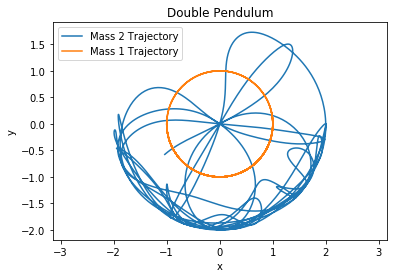

In [59]:
import numpy as np
from math import sin as sin
from math import cos as cos
from math import pi as pi
import matplotlib.pyplot as plt

t_final = 20.0
dt = 0.01
t_points = np.arange(0, t_final, dt)

theta1_0 = pi/2
theta2_0 = pi/2
omega1_0 = 0
omega2_0 = 0
L_1 = 1.0
L_2 = 1.0
m_1 = 1.0
m_2 = 1.0
M = m_1 + m_2
g = 9.8

def f1(theta1, theta2, omega1, omega2, t):
    """
    d(theta1)/dt
    """
    return omega1

def f2(theta1, theta2, omega1, omega2, t):
    """
    d(theta2)/dt
    """
    return omega2

def g1(theta1, theta2, omega1, omega2, t):
    """
    d(omega1)/dt
    """
    return (-g*M*sin(theta1) - m_2*L_2*omega2**2*sin(theta1 - theta2) + m_2*g*cos(theta1 - theta2)*sin(theta2) - m_2*L_1*omega1**2*sin(theta1 - theta2)*cos(theta1 - theta2))/(L_1*M - L_1*m_2*cos(theta1 - theta2)**2)

def g2(theta1, theta2, omega1, omega2, t):
    """
    d(omega2)/dt
    """
    return (-g*M*sin(theta2) + M*L_1*omega1**2*sin(theta1 - theta2) + M*g*sin(theta1)*cos(theta1 - theta2) + L_2*m_2*omega2**2*sin(theta1 - theta2)*cos(theta1 - theta2))/(M*L_2 - m_2*L_2*cos(theta1 - theta2)**2)

def time_and_angles_double_style():
    """
    Returns three numpy arrays:
    1. Times
    2. Angles of first pendulum
    3. Angles of second pendulum
    Uses leap-frog algorithm
    """
    
    theta1_points = []
    theta2_points = []
    omega1_points = []
    omega2_points = []
    
    #Initializing the variables
    theta1 = theta1_0
    theta2 = theta2_0
    omega1 = omega1_0
    omega2 = omega2_0
    
    #Initializing Halfsies
    theta1_half = theta1_0 + 0.5*dt*f1(theta1_0, theta2_0, omega1_0, omega2_0, 0)
    theta2_half = theta2_0 + 0.5*dt*f2(theta1_0, theta2_0, omega1_0, omega2_0, 0)
    omega1_half = omega1_0 + 0.5*dt*g1(theta1_0, theta2_0, omega1_0, omega2_0, 0)
    omega2_half = omega2_0 + 0.5*dt*g2(theta1_0, theta2_0, omega1_0, omega2_0, 0)
    
    for t in t_points:
        # Record theta, omega
        theta1_points.append(theta1)
        theta2_points.append(theta2)
        omega1_points.append(omega1)
        omega2_points.append(omega2)
            
        # Time step using Leap-Frog 
        theta1 += dt*f1(theta1_half, theta2_half, omega1_half, omega2_half, t + 0.5*dt)
        theta2 += dt*f2(theta1_half, theta2_half, omega1_half, omega2_half, t + 0.5*dt)
        omega1 += dt*g1(theta1_half, theta2_half, omega1_half, omega2_half, t + 0.5*dt)
        omega2 += dt*g2(theta1_half, theta2_half, omega1_half, omega2_half, t + 0.5*dt)
        
        theta1_half += dt*f1(theta1, theta2, omega1, omega2, t + dt)
        theta2_half += dt*f2(theta1, theta2, omega1, omega2, t + dt)
        omega1_half += dt*g1(theta1, theta2, omega1, omega2, t + dt)
        omega2_half += dt*g2(theta1, theta2, omega1, omega2, t + dt)
        
    t_np = np.array(t_points)
    theta1_np = np.array(theta1_points)
    theta2_np = np.array(theta2_points)
    omega1_np = np.array(omega1_points)
    omega2_np = np.array(omega2_points)
    
    return t_np, theta1_np, theta2_np, omega1_np, omega2_np

times, thetas1, thetas2, omegas1, omegas2 = time_and_angles_double_style()

x1_position = L_1*np.sin(thetas1)
y1_position = -L_1*np.cos(thetas1)

x2_position = L_1*np.sin(thetas1) + L_2*np.sin(thetas2)
y2_position = -L_1*np.cos(thetas1) - L_2*np.cos(thetas2)

plt.plot(x2_position, y2_position, label='Mass 2 Trajectory')
plt.plot(x1_position, y1_position, label='Mass 1 Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title("Double Pendulum")
plt.legend()
plt.show()

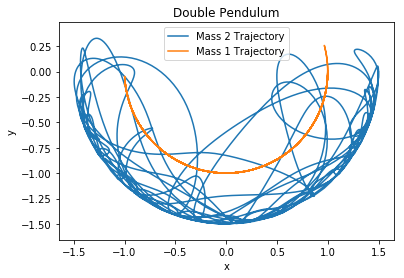

In [63]:
import matplotlib.pyplot as plt2

t_final = 20.0
dt = 0.01
t_points = np.arange(0, t_final, dt)

theta1_0 = pi/2
theta2_0 = pi/2
omega1_0 = 0
omega2_0 = 0
L_1 = 1.0
L_2 = 0.5
m_1 = 1.0
m_2 = 0.2
M = m_1 + m_2

times, thetas1, thetas2, omegas1, omegas2 = time_and_angles_double_style()

x1_position = L_1*np.sin(thetas1)
y1_position = -L_1*np.cos(thetas1)

x2_position = L_1*np.sin(thetas1) + L_2*np.sin(thetas2)
y2_position = -L_1*np.cos(thetas1) - L_2*np.cos(thetas2)

plt.plot(x2_position, y2_position, label='Mass 2 Trajectory')
plt.plot(x1_position, y1_position, label='Mass 1 Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title("Double Pendulum")
plt.legend()
plt.show()

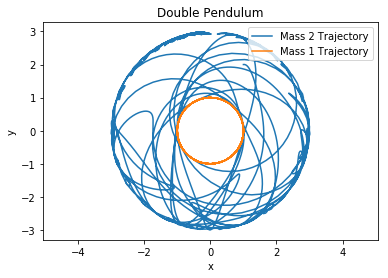

In [58]:
import matplotlib.pyplot as plt3

t_final = 20.0
dt = 0.01
t_points = np.arange(0, t_final, dt)

theta1_0 = pi/2
theta2_0 = pi
omega1_0 = 0.2
omega2_0 = -0.5
L_1 = 1.0
L_2 = 2.0
m_1 = 1.0
m_2 = 0.5
M = m_1 + m_2

times, thetas1, thetas2, omegas1, omegas2 = time_and_angles_double_style()

x1_position = L_1*np.sin(thetas1)
y1_position = -L_1*np.cos(thetas1)

x2_position = L_1*np.sin(thetas1) + L_2*np.sin(thetas2)
y2_position = -L_1*np.cos(thetas1) - L_2*np.cos(thetas2)

plt.plot(x2_position, y2_position, label='Mass 2 Trajectory')
plt.plot(x1_position, y1_position, label='Mass 1 Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title("Double Pendulum")
plt.legend()
plt.show()

## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI)

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

In [46]:
#Constants
M = 100        #Grid squares per side
V = 400        #Potential of squares
target = 1e-2

phi = np.zeros([M+2, M+2], float)
for i in range (21,41):
    for j in range (21,41):
        phi[i,j] = -V
for i in range(61,81):
    for j in range(61,81):
        phi[i,j] = V
phiprime = np.zeros([M+2, M+2], float)        

delta = 1.0
while (delta > target):
    for i in range(M+2):
        for j in range(M+2):
            if (i == 0) or (i == M+1) or (j == 0) or (j == M+1):
                phiprime[i,j] = phi[i,j]
            elif (phi[i,j] == -V) or (phi[i,j] == V):
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4.
                
    delta = np.max(np.abs(phi-phiprime))
            
    phi, phiprime = phiprime, phi    

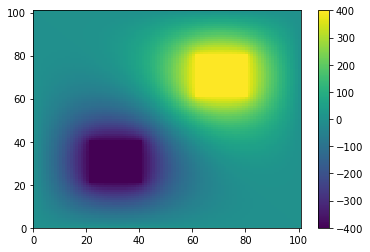

In [47]:
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(M+2),np.arange(M+2))
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.show()